### Importação dos dados



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url = "base-de-dados-challenge-1/loja_1.csv"
url2 = "base-de-dados-challenge-1/loja_2.csv"
url3 = "base-de-dados-challenge-1/loja_3.csv"
url4 = "base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [3]:
def faturamento(dicionario):
  return round(sum(dicionario["Preço"]), 2)

faturamento_loja1 = faturamento(loja1)
faturamento_loja2 = faturamento(loja2)
faturamento_loja3 = faturamento(loja3)
faturamento_loja4 = faturamento(loja4)

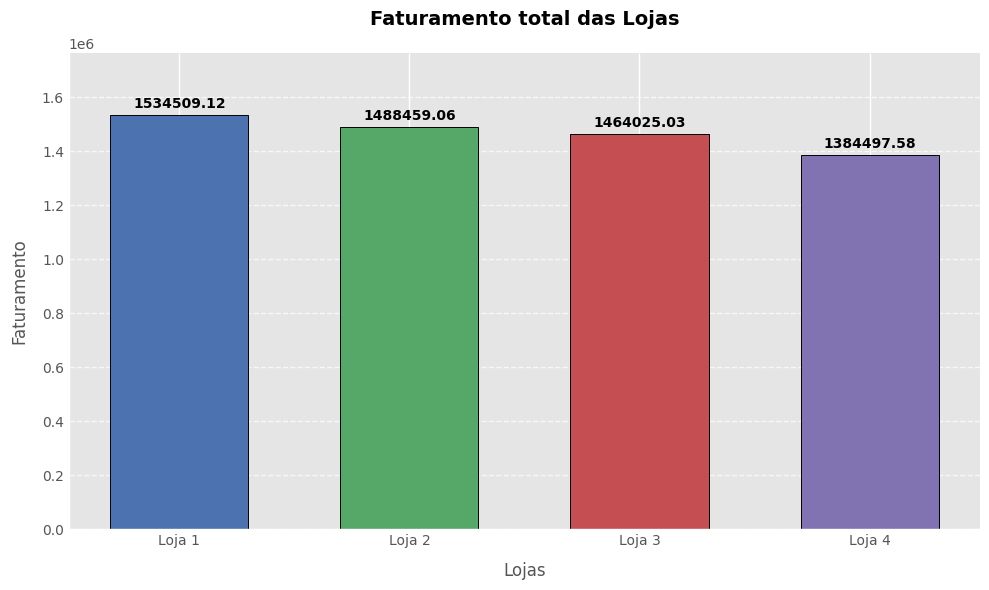

In [57]:

def grafico_barras(conteudo, titulo_principal, titulo_vertical):
    categorias = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
    cores = ['#4C72B0', '#55A868', '#C44E52', '#8172B2'] 
    plt.style.use('ggplot') 
    fig, ax = plt.subplots(figsize=(10, 6)) 
    barras = ax.bar(categorias, conteudo, color=cores, edgecolor='black', linewidth=0.7, width=0.6)
    for barra in barras:
        height = barra.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(barra.get_x() + barra.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10, fontweight='bold')
    ax.set_title(titulo_principal, fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Lojas', fontsize=12, labelpad=10)
    ax.set_ylabel(titulo_vertical, fontsize=12, labelpad=10)
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_axisbelow(True) 
    ax.set_ylim(0, max(conteudo) * 1.15) 
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    
    plt.show()

faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]

faturamento_lojas = grafico_barras(faturamentos, "Faturamento total das Lojas", "Faturamento")


OBS:<br> 
    - loja 4 a que menos faturou;<br>
    - loja 3 a segunda que menos faturou.

# 2. Vendas por Categoria


In [47]:
def separar_coluna(dicionario, coluna):
  return dicionario[coluna].value_counts()

vendas_categoria_loja1 = separar_coluna(loja1, "Categoria do Produto")
vendas_categoria_loja2 = separar_coluna(loja2, "Categoria do Produto")
vendas_categoria_loja3 = separar_coluna(loja3, "Categoria do Produto")
vendas_categoria_loja4 = separar_coluna(loja4, "Categoria do Produto") 


,Categoria,Quantidade
0,moveis,465
1,eletronicos,448
2,brinquedos,324
3,eletrodomesticos,312
4,esporte e lazer,284


In [59]:
import plotly.express as px

def grafico_barrah(df, loja):
	dict_df = {'Categoria': df.index.tolist(), 'Vendas': df.values.tolist()}
	df = pd.DataFrame(dict_df)
	fig = px.bar(df, y=df['Categoria'], x=df['Vendas'], title='Distribuição de vendas por categoria')
	fig.update_layout(
		xaxis_title='Número de compras',
		yaxis_title='Categorias')

	fig.show()

In [60]:
vendas_categoria_grafico_loja1 = grafico_barrah(vendas_categoria_loja1, "Loja")
vendas_categoria_grafico_loja2 = grafico_barrah(vendas_categoria_loja2, "Loja2")
vendas_categoria_grafico_loja3 = grafico_barrah(vendas_categoria_loja3, "Loja3")
vendas_categoria_grafico_loja3 = grafico_barrah(vendas_categoria_loja4, "Loja4")

OBS: categorias mais populares de todas as lojas são móveis, eletrônicos e brinquedos.

# 3. Média de Avaliação das Lojas

In [ ]:
def media_avaliacao_frete(df, nome_coluna):
  return round(df[nome_coluna].mean(), 2)

media_avaliacao_loja1 = media_avaliacao_frete(loja1, "Avaliação da compra")  
media_avaliacao_loja2 = media_avaliacao_frete(loja2, "Avaliação da compra")
media_avaliacao_loja3 = media_avaliacao_frete(loja3, "Avaliação da compra")
media_avaliacao_loja4 = media_avaliacao_frete(loja4, "Avaliação da compra")

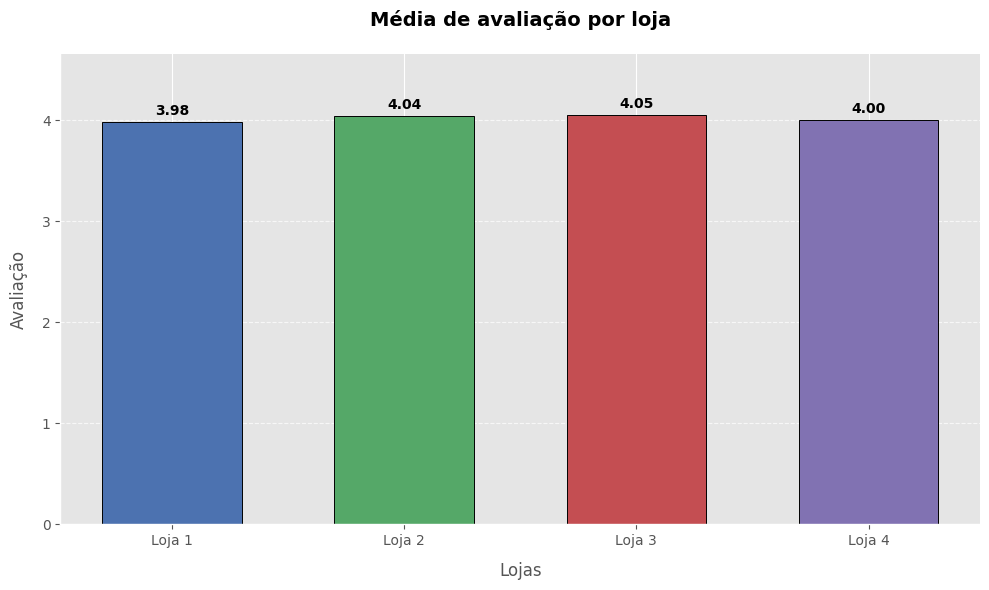

In [ ]:
avaliacao = [media_avaliacao_loja1, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]

media_avaliacao = grafico_barras(avaliacao, "Média de avaliação por loja", "Avaliação")


OBS:<br>
    - loja 1 pior avaliação; <br>
    - loja 4 segunda pior.

# 4. Produtos Mais e Menos Vendidos

In [ ]:
vendas_produto_loja1 = separar_coluna(loja1, "Produto")
vendas_produto_loja2 = separar_coluna(loja2, "Produto")
vendas_produto_loja3 = separar_coluna(loja3, "Produto")
vendas_produto_loja4 = separar_coluna(loja4, "Produto") 

def produtos_mais_menos_vendidos(coluna_produto):
  mais_vendido = [coluna_produto.index[i] for i in range(3)]
  menos_vendido = [coluna_produto.index[i] for i in range(-1, -4, -1)]
  return f"os três produtos mais vendidos foram:\n {mais_vendido}\nOs três produtos menos vendidos foram:\n {menos_vendido}"

resultado_produto1 = produtos_mais_menos_vendidos(vendas_produto_loja1)
resultado_produto2 = produtos_mais_menos_vendidos(vendas_produto_loja2)
resultado_produto3 = produtos_mais_menos_vendidos(vendas_produto_loja3)
resultado_produto4 = produtos_mais_menos_vendidos(vendas_produto_loja4)



In [ ]:
print(f"Loja 1 - {resultado_produto1}\n\nLoja 2 - {resultado_produto2}\n\nLoja 3 - {resultado_produto3}\n\nLoja 4 - {resultado_produto4}")

Loja 1 - os três produtos mais vendidos foram:
 ['TV Led UHD 4K', 'Guarda roupas', 'Micro-ondas']
Os três produtos menos vendidos foram:
 ['Celular ABXY', 'Headset', 'Panela de pressão']

Loja 2 - os três produtos mais vendidos foram:
 ['Iniciando em programação', 'Micro-ondas', 'Bateria']
Os três produtos menos vendidos foram:
 ['Jogo de tabuleiro', 'Impressora', 'Mesa de jantar']

Loja 3 - os três produtos mais vendidos foram:
 ['Kit banquetas', 'Cama king', 'Mesa de jantar']
Os três produtos menos vendidos foram:
 ['Blocos de montar', 'Jogo de copos', 'Micro-ondas']

Loja 4 - os três produtos mais vendidos foram:
 ['Cama box', 'Faqueiro', 'Dashboards com Power BI']
Os três produtos menos vendidos foram:
 ['Guitarra', 'Guarda roupas', 'Violão']


# 5. Frete Médio por Loja


In [ ]:
media_frete_loja1 = media_avaliacao_frete(loja1, "Frete")  
media_frete_loja2 = media_avaliacao_frete(loja2, "Frete")
media_frete_loja3 = media_avaliacao_frete(loja3, "Frete")
media_frete_loja4 = media_avaliacao_frete(loja4, "Frete")

In [ ]:
print(f"Média do Frete\nLoja 1 - {media_frete_loja1}\nLoja2 - {media_frete_loja2}\nLoja3 - {media_frete_loja3}\nLoja4 - {media_frete_loja4}")

Média do Frete
Loja 1 - 34.69
Loja2 - 33.62
Loja3 - 33.07
Loja4 - 31.28


OBS:<br>
    - loja 4 mais barato <br>
    - loja 3 segundo mais barato <br>
    - loja 2 segundo mais caro <br>
    - loja 1 mais caro

# 6. Conclusão

Após a análise de todos os dados pode-se chegar a conclusão de que a <b>melhor loja a ser vendida seria Loja 4</b>. Os principais pontos a serem considerados são: apesar de possuir o frete mais barato, o que deveria ser um bom indicativo para o faturamento e também atrativo para os clientes, possui a segunda pior avaliação e também é a loja que menos faturou.<br> 
De modo geral, <b>a Loja 4 não se destaca positivamente em nenhum dos pontos analisados</b>, diferente das outras lojas analisadas:<br>
    - Loja 1, com o maior faturamento, mesmo possuindo a pior avaliação. <br>
    - Loja 2, com o segundo melhor faturamento e avaliação. <br>
    - Loja 3, com a melhor avaliação e o segundo frete mais barato.
